# Exploratory Data Analysis on Books Sales and Ratings 

## Problem Statement

Evergreen Publishing Inc. is an imaginary mid-sized publishing company that has been in the business for over 20 years. They publish a wide variety of genres, including fiction, non-fiction, fantasy, mystery, and self-help. Despite their diverse catalog, they have noticed a stagnation in sales growth and are experiencing increasing competition from both established publishing houses and self-published authors.

Evergreen Publishing Inc. wants to **optimize their marketing strategies to boost book sales and improve reader engagement**. They have approached your data analytics team to help them understand key factors driving sales and ratings, and to provide actionable insights for improving their marketing efforts.

## Specific Request

1. Sales Performance
    - Which books have the highest gross sales and units sold?
    - Which author and publisher have the highest sale performance?
    - How do different genres compare in terms of sales performance?
2. Ratings and Reviews
    - What is the distribution of book average ratings across different genres?
    - Which books and authors receive the highest average ratings?
3. Genre Analysis
    - Which genres are most and least popular among readers in terms of sales and ratings?
    - How do different genres perform in terms of gross sales and publisher revenue?
    - Are there any emerging genres that show significant growth in sales and ratings?
    - Is there a correlation in which readers of one genre are likely to purchase books from another genre?

## Deliverables
1. A brief assessment of the dataset is required: the client want to your team to identify data quality issues as strategies to mitigate the issues. This should be in form of an email.
2. Data visualization for each area of analysis as mentioned above to present findings clearly.

## Data Dictionary

The dataset consists of 1070 entries with 15 attributes per entry, providing comprehensive data on book names, authors, publishing year, language, average ratings, number of ratings, genre, gross sales, publisher revenue, sale price, sales rank, publisher, and units sold. 

| Column Name           | Data Type | Description                                               |
|-----------------------|-----------|-----------------------------------------------------------|
| Index                 | Numeric   | Unique identifier of the book                             |
| Publishing Year       | Numeric   | The year in which the book was published                  |
| Book Name             | Text      | The title of the book                                     |
| Author                | Text      | Author’s name of the book                                 |
| language_code         | Text      | The code representing the language in which the book is written |
| Author_Rating         | Numeric   | The rating of the author based on their previous works    |
| Book_average_rating   | Numeric   | The average rating given to the book by readers           |
| Book_ratings_count    | Numeric   | The number of ratings given to the book by readers        |
| genre                 | Text      | The genre or category to which the book belongs           |
| gross_sales           | Numeric   | The total sales revenue generated by a specific book      |

Data Source: Murrey, J. (n.d.). Books Dataset: Analyzing Sales, Ratings, and Genres. Kaggle. Retrieved May 15, 2024, from https://www.kaggle.com/datasets/thedevastator/books-sales-and-ratings

## Data Cleaning and Preparation
Before starting with the analysis, we will first conduct data cleaning processes namely checking for missing values, duplicates, and data types. In addition, after looking through the dataset, we also notice that some values are *mojibakes* - unreadable, gibberish characters and thus will use ftfy package to fix these texts.

In [ ]:
pip install pandas

In [14]:
import pandas as pd

file_path = r"C:\Users\BaoKhanhTran\Downloads\Books_Data_Clean.csv"

df = pd.read_csv(file_path)

print(df.head())

   index  Publishing Year                        Book Name  \
0      0           1975.0                          Beowulf   
1      1           1987.0                 Batman: Year One   
2      2           2015.0                Go Set a Watchman   
3      3           2008.0  When You Are Engulfed in Flames   
4      4           2011.0         Daughter of Smoke & Bone   

                                              Author language_code  \
0                             Unknown, Seamus Heaney         en-US   
1  Frank Miller, David Mazzucchelli, Richmond Lew...           eng   
2                                         Harper Lee           eng   
3                                      David Sedaris         en-US   
4                                       Laini Taylor           eng   

  Author_Rating  Book_average_rating  Book_ratings_count          genre  \
0        Novice                 3.42              155903  genre fiction   
1  Intermediate                 4.23              145267

### Check for missing values
Here we want to check if there is Null values.

In [42]:
print(df.isnull().sum())

index                  0
Publishing Year        0
Book Name              0
Author                 0
language_code          0
Author_Rating          0
Book_average_rating    0
Book_ratings_count     0
genre                  0
gross sales            0
publisher revenue      0
sale price             0
sales rank             0
Publisher              0
units sold             0
dtype: int64


The result shows that the dataset does not have any null value.

### Check for duplicates
Here we want to check if there is duplicate data.

In [43]:
print(df.duplicated().sum())

0


The result shows that there is no duplicate data.

### Check data types
Here we want to check if the indexes have the right data types

In [44]:
print(df.dtypes)

index                    int64
Publishing Year        float64
Book Name               object
Author                  object
language_code           object
Author_Rating           object
Book_average_rating    float64
Book_ratings_count       int64
genre                   object
gross sales            float64
publisher revenue      float64
sale price             float64
sales rank               int64
Publisher               object
units sold               int64
dtype: object


### Data cleaning and mojibake fixing

With a quick glance at the dataset, we notice that there are some *mojibakes* - gibberish texts in Book Name and Author columns. For this reason, we will use ftfy package to fix these.

In [45]:
pip install ftfy

Note: you may need to restart the kernel to use updated packages.


In [46]:
import pandas as pd
import ftfy

# Load the dataset
df = pd.read_csv('C:/Users/BaoKhanhTran/Downloads/Books_Data_Clean.csv')

# Function to fix mojibake in a pandas series
def fix_mojibake(series):
    return series.apply(lambda x: ftfy.fix_text(str(x)) if pd.notnull(x) else x)

# Apply the function to all string columns
for col in df.select_dtypes(include=[object]).columns:
    df[col] = fix_mojibake(df[col])

# Drop rows with any missing values
df_cleaned = df.dropna()

# Save the cleaned data
df_cleaned.to_csv('C:/Users/BaoKhanhTran/Downloads/Books_Data_Cleaned.csv', index=False)

# Display the first few rows to check the cleaned data
print(df_cleaned.head())

   index  Publishing Year                        Book Name  \
0      0           1975.0                          Beowulf   
1      1           1987.0                 Batman: Year One   
2      2           2015.0                Go Set a Watchman   
3      3           2008.0  When You Are Engulfed in Flames   
4      4           2011.0         Daughter of Smoke & Bone   

                                              Author language_code  \
0                             Unknown, Seamus Heaney         en-US   
1  Frank Miller, David Mazzucchelli, Richmond Lew...           eng   
2                                         Harper Lee           eng   
3                                      David Sedaris         en-US   
4                                       Laini Taylor           eng   

  Author_Rating  Book_average_rating  Book_ratings_count          genre  \
0        Novice                 3.42              155903  genre fiction   
1  Intermediate                 4.23              145267

In [48]:
# Save the cleaned data
df_cleaned.to_csv('C:/Users/BaoKhanhTran/Downloads/Books_Data_Cleaned.csv', index=False)
print(df.head())

   index  Publishing Year                        Book Name  \
0      0           1975.0                          Beowulf   
1      1           1987.0                 Batman: Year One   
2      2           2015.0                Go Set a Watchman   
3      3           2008.0  When You Are Engulfed in Flames   
4      4           2011.0         Daughter of Smoke & Bone   

                                              Author language_code  \
0                             Unknown, Seamus Heaney         en-US   
1  Frank Miller, David Mazzucchelli, Richmond Lew...           eng   
2                                         Harper Lee           eng   
3                                      David Sedaris         en-US   
4                                       Laini Taylor           eng   

  Author_Rating  Book_average_rating  Book_ratings_count          genre  \
0        Novice                 3.42              155903  genre fiction   
1  Intermediate                 4.23              145267

## Deliverable 1 - Email

A brief assessment of the dataset is required: the client want to your team to identify data quality issues as strategies to mitigate the issues. Here is the email we will send to Evergreen Publishing Inc. Team to report on the quality of their dataset based on the data cleaning and processing above.

*Dear Evergreen Publishing Inc. Team,*

*Thank you for providing us with the dataset from Evergreen Publishing Inc. After a thorough assessment of the dataset, we identified the following data quality issues and implemented appropriate strategies to mitigate them:*

*Various columns, especially ‘Book Name’ and ‘language_code’ have empty values in certain records. As both are critical identifiers, rows with missing book names and code language were removed from the dataset to ensure data integrity.*
*Mojibake - character encoding issue. Some “mojibake” - gibberish, corrupt text were found in ‘Book Name’ and ‘Author’ columns. We have implemented ftfy package to solve this issue.*
*No duplicate entries were found.*
*Moving forward, the team will continue with the data cleaning, standardisation and transformation process for the purpose of model analysis. Questions will be raised along the way and assumptions documented. After we have completed this, it would be great to spend some time with your data SME to ensure that all assumptions are aligned with Evergreen Publishing’s understanding.*

*Kind regards,*

*Khanh Tran*

*Junior Data Analyst.*


## EDA

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

## Deliverable 2 - Data visualization

### Sales Performance

#### Books with the highest gross sales
We want to understand which books are driving the most revenue, which can help inform marketing strategies, such as promoting similar books or authors

Top 10 best-selling books by gross sales:                                    Book Name  \
2                         Go Set a Watchman   
3           When You Are Engulfed in Flames   
4                  Daughter of Smoke & Bone   
0                                   Beowulf   
6                        The Power of Habit   
26                      The Virgin Suicides   
7   Midnight in the Garden of Good and Evil   
8                                  Hopeless   
9                         A Little Princess   
14                     The Velveteen Rabbit   

                                          Author  gross sales  
2                                     Harper Lee     47795.00  
3                                  David Sedaris     41250.00  
4                                   Laini Taylor     37952.50  
0                         Unknown, Seamus Heaney     34160.00  
6                                 Charles Duhigg     27491.67  
26                             Jeffrey Eugenides     26

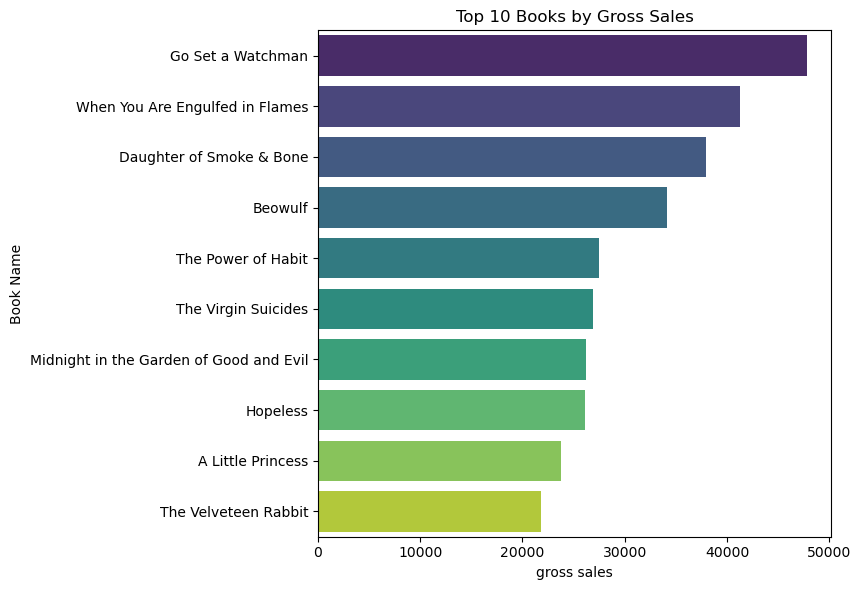

In [28]:
top_gross_sales_books = df[['Book Name', 'Author', 'gross sales']].sort_values(by='gross sales', ascending=False).head(10)
print('Top 10 best-selling books by gross sales: ', top_gross_sales_books)

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='gross sales', y='Book Name', data=top_gross_sales_books, palette='viridis')
plt.title('Top 10 Books by Gross Sales')

plt.tight_layout()
plt.show()

#### Books with the highest units sold


Top 10 best-selling books by units sold:                                               Book Name  \
578  New Moon: The Complete Illustrated Movie Compa...   
579                                      Maybe Someday   
580                                           Mr Maybe   
581                                 Anne of the Island   
582                            Also sprach Zarathustra   
583                                    North and South   
584                                      A Stolen Life   
585                            The Immortals of Meluha   
586                                     The Lost World   
587                                            Requiem   

                                   Author  units sold  
578                        Mark Cotta Vaz       61560  
579                        Colleen Hoover       61128  
580                            Jane Green       61128  
581                       L.M. Montgomery       60696  
582  Friedrich Nietzsche, Walter Kaufm

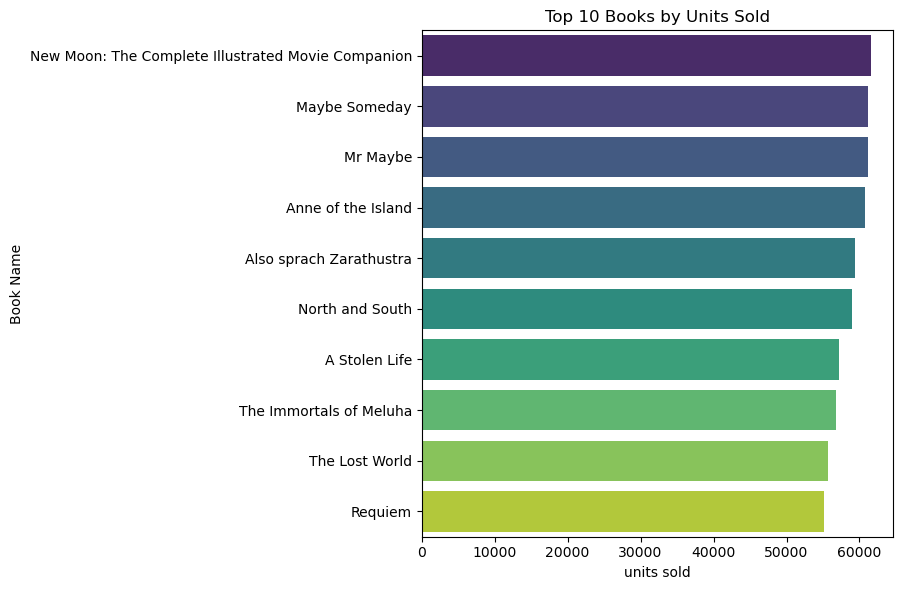

In [29]:
top_units_sold_books = df[['Book Name', 'Author', 'units sold']].sort_values(by='units sold', ascending=False).head(10)
print('\nTop 10 best-selling books by units sold: ', top_units_sold_books)

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 2)
sns.barplot(x='units sold', y='Book Name', data=top_units_sold_books, palette='viridis')
plt.title('Top 10 Books by Units Sold')

plt.tight_layout()
plt.show()

#### Author with the highest gross sales

Top 10 authors by gross sales:  Author
Harper Lee                47795.00
David Sedaris             42323.41
Charlaine Harris          39453.08
Stephen King              39203.89
Laini Taylor              38278.41
Unknown, Seamus Heaney    34160.00
Sarah Dessen              31034.85
Colleen Hoover            29706.14
C.S. Lewis                28972.57
Jeffrey Eugenides         27984.38
Name: gross sales, dtype: float64


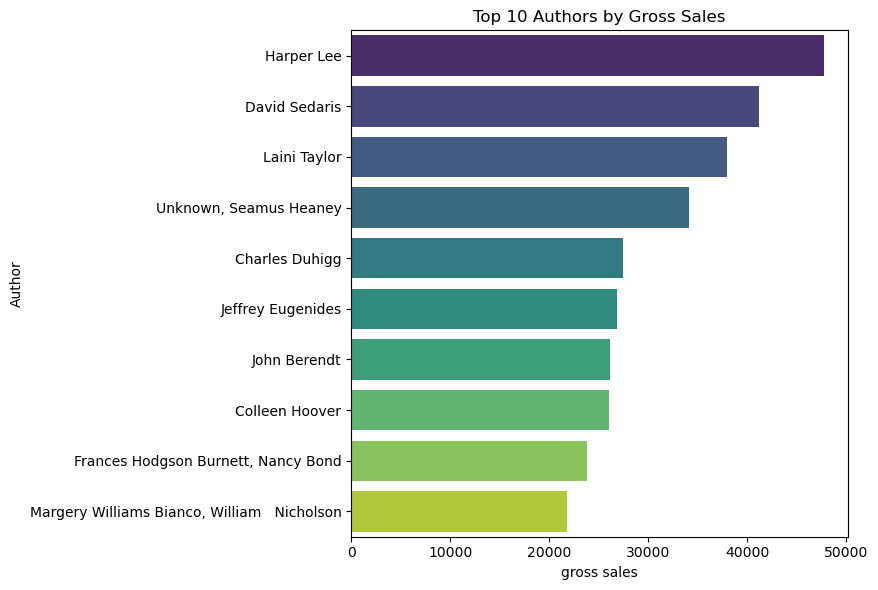

In [31]:
top_author_sales = df.groupby('Author')['gross sales'].sum().sort_values(ascending=False).head(10)
print('Top 10 authors by gross sales: ', top_author_sales)

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='gross sales', y='Author', data=top_gross_sales_books, palette='viridis')
plt.title('Top 10 Authors by Gross Sales')

plt.tight_layout()
plt.show()

#### Publisher with the highest gross sales


Top 10 Publishers by Gross Sales: Publisher 
Amazon Digital Services,  Inc.          704763.72
Penguin Group (USA) LLC                 328669.97
Random House LLC                        285627.88
Hachette Book Group                     214407.33
HarperCollins Publishers                208833.20
Simon and Schuster Digital Sales Inc     77607.47
Macmillan                                53127.95
HarperCollins Publishing                  4718.01
HarperCollins Christian Publishing        3559.45
Name: gross sales, dtype: float64


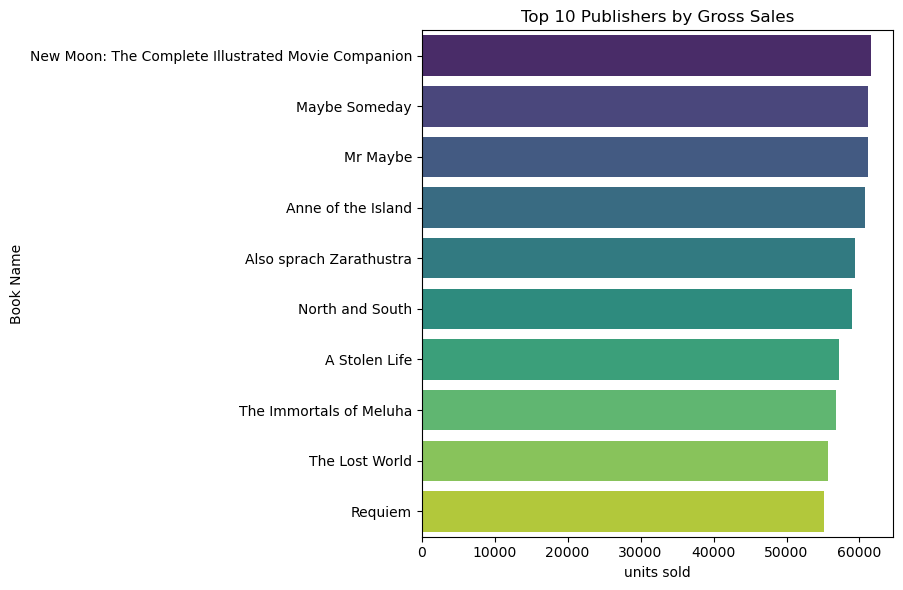

In [32]:
top_publisher_sales = df.groupby('Publisher ')['gross sales'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 Publishers by Gross Sales:", top_publisher_sales)

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 2)
sns.barplot(x='units sold', y='Book Name', data=top_units_sold_books, palette='viridis')
plt.title('Top 10 Publishers by Gross Sales')

plt.tight_layout()
plt.show()

#### Sales performance by genre 
Comparing sales performance by genre helps identify which genres are most lucratice and which may need more marketing support.

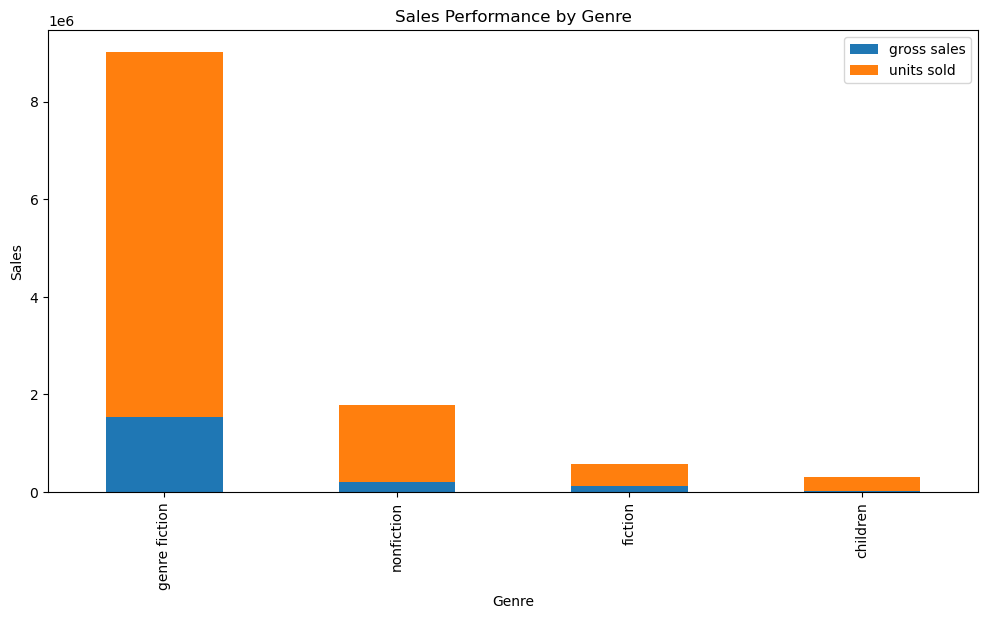

In [33]:
genre_sales_performance = df.groupby('genre')[['gross sales', 'units sold']].sum().reset_index().sort_values(by='gross sales', ascending=False)

genre_sales_performance.plot(kind='bar', x='genre', stacked=True, figsize=(12, 6))
plt.title('Sales Performance by Genre')
plt.ylabel('Sales')
plt.xlabel('Genre')
plt.show()


### Ratings and Reviews

#### Distribution of book average ratings by genre
We want to understand how ratings vary by genre because this can help our marketing strategies to focus on highly-rated genres and at the same time improve the perceptions of lower-rated ones.

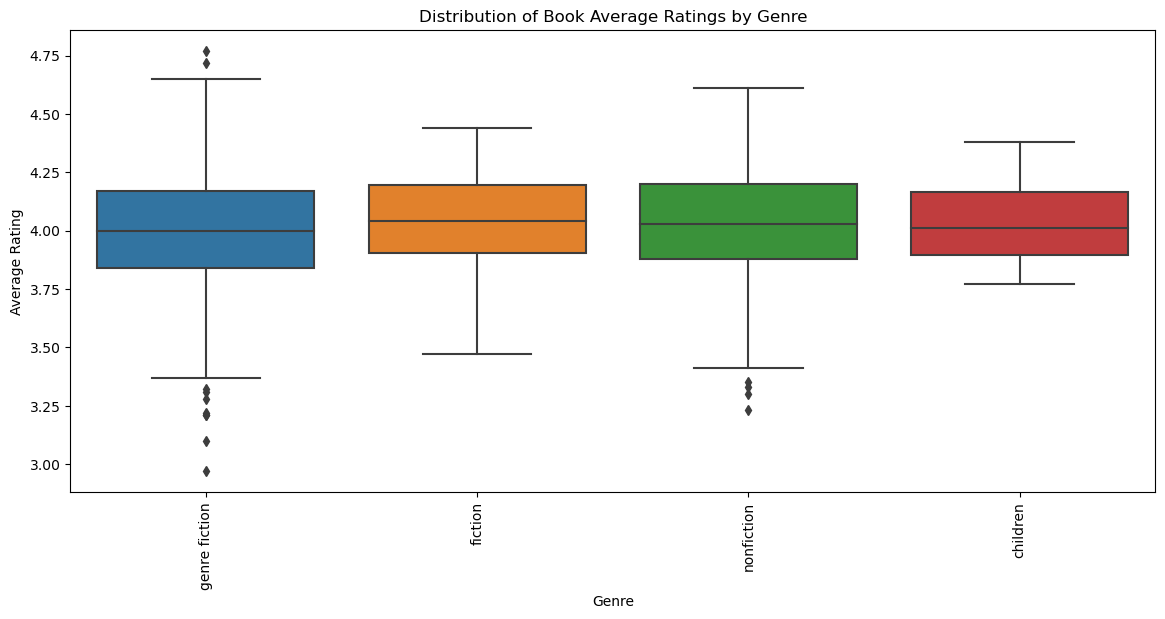

In [34]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='genre', y='Book_average_rating', data=df)
plt.title('Distribution of Book Average Ratings by Genre')
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.show()

#### Books with the highest average ratings

Top 10 books by average rating:                                              Book Name  \
331                                  Words of Radiance   
777                           A Court of Mist and Fury   
479  The Essential Calvin and Hobbes: A Calvin and ...   
31                                    The Way of Kings   
249                                  Calvin and Hobbes   
733                                   Queen of Shadows   
433               The Hobbit and The Lord of the Rings   
965           A Storm of Swords: Part 2 Blood and Gold   
153                                 The House of Hades   
849                                  The Complete Maus   

                           Author  Book_average_rating  
331             Brandon Sanderson                 4.77  
777                 Sarah J. Maas                 4.72  
479                Bill Watterson                 4.65  
31              Brandon Sanderson                 4.64  
249  Bill Watterson, G.B. Trudeau           

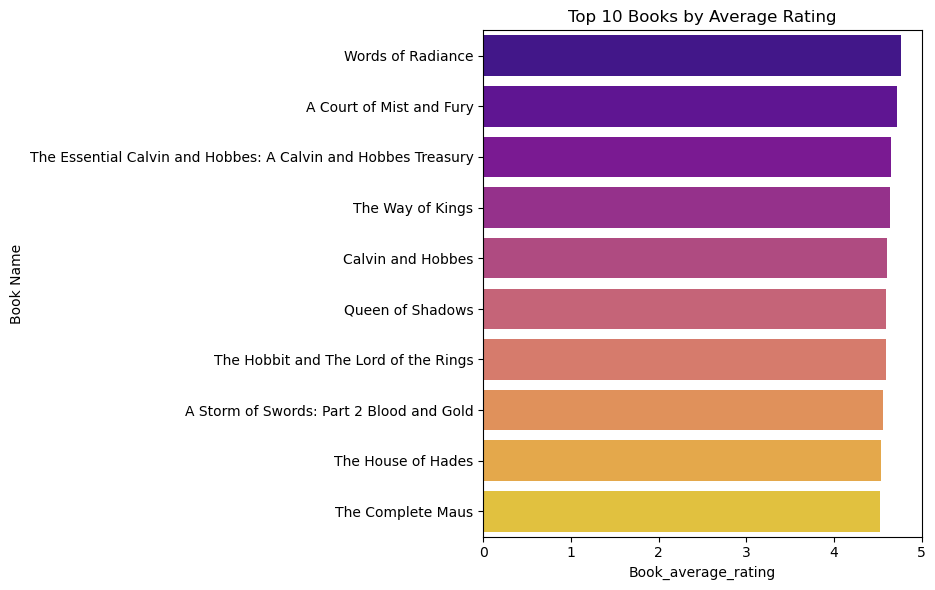

In [35]:
top_rated_books = df[['Book Name','Author','Book_average_rating']].sort_values(by='Book_average_rating',ascending=False).head(10)
print('Top 10 books by average rating:', top_rated_books)

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='Book_average_rating', y='Book Name', data=top_rated_books, palette='plasma')
plt.title('Top 10 Books by Average Rating')

plt.tight_layout()
plt.show()

#### Authors with the highest average ratings (of their books)


Top 10 authors by average rating:                            Author  Book_average_rating
0                  Bill Watterson                4.650
1    Bill Watterson, G.B. Trudeau                4.610
2                  J.R.R. Tolkien                4.590
3              George R.R. Martin                4.560
4                   Sarah J. Maas                4.526
5  Hiromu Arakawa, Akira Watanabe                4.490
6                 Cassandra Clare                4.480
7                  Art Spiegelman                4.470
8                  Larry McMurtry                4.470
9   Jon Stone, Michael J. Smollin                4.450


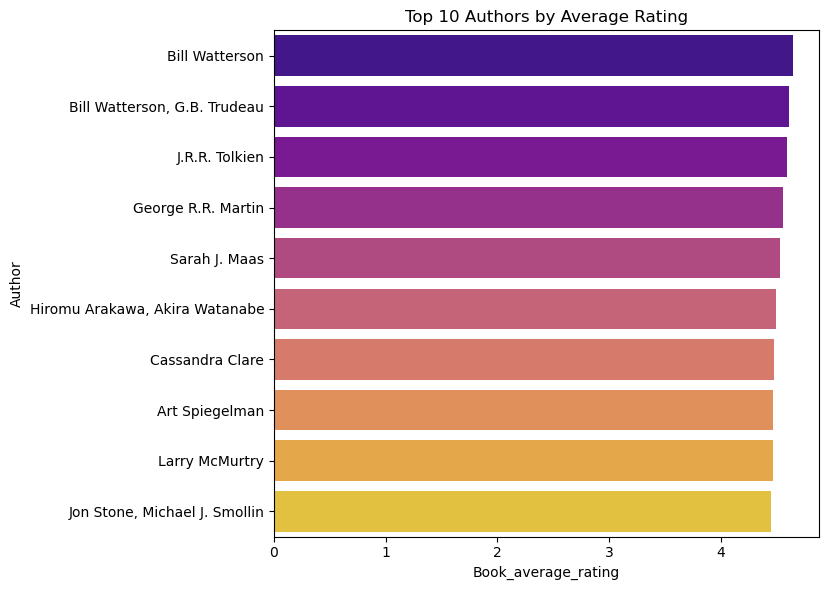

In [37]:
top_rated_authors = df.groupby('Author')['Book_average_rating'].mean().sort_values(ascending=False).head(10).reset_index()
print('\nTop 10 authors by average rating:', top_rated_authors)

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 2)
sns.barplot(x='Book_average_rating', y='Author', data=top_rated_authors, palette='plasma')
plt.title('Top 10 Authors by Average Rating')

plt.tight_layout()
plt.show()

### Genre Analysis

#### Popularity of genres by sales and ratings

Popularity of Genres by Sales and Ratings:
               gross sales  Book_average_rating
genre                                          
genre fiction   1535794.78             3.996451
nonfiction       215894.42             4.020897
fiction          115723.56             4.036909
children          13902.22             4.033333


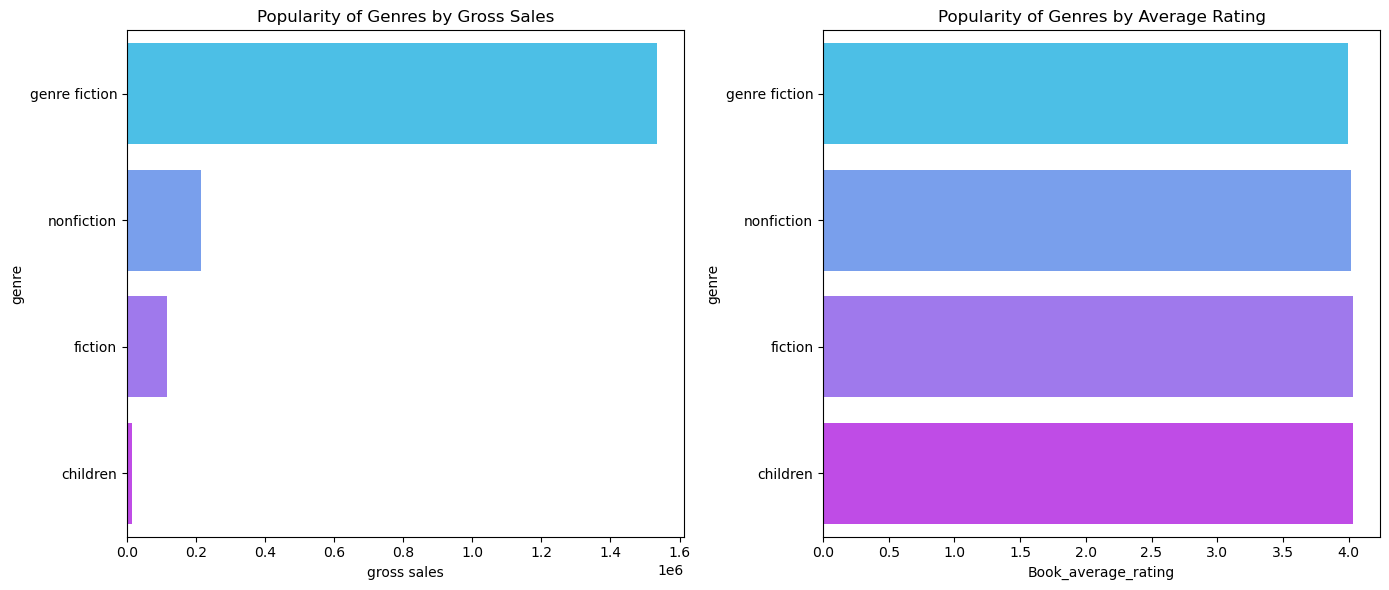

In [38]:
genre_popularity = df.groupby('genre')[['gross sales', 'Book_average_rating']].agg({'gross sales': 'sum', 'Book_average_rating': 'mean'}).sort_values(by='gross sales', ascending=False)
print('Popularity of Genres by Sales and Ratings:')
print(genre_popularity)

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='gross sales', y=genre_popularity.index, data=genre_popularity.reset_index(), palette='cool')
plt.title('Popularity of Genres by Gross Sales')

plt.subplot(1, 2, 2)
sns.barplot(x='Book_average_rating', y=genre_popularity.index, data=genre_popularity.reset_index(), palette='cool')
plt.title('Popularity of Genres by Average Rating')

plt.tight_layout()
plt.show()

#### Performance of genres by gross sales and publisher revenue

Genre Performance by Gross Sales and Publisher Revenue:
               gross sales  publisher revenue
genre                                        
genre fiction   1535794.78         648769.962
nonfiction       215894.42         125047.092
fiction          115723.56          65041.770
children          13902.22           8341.332


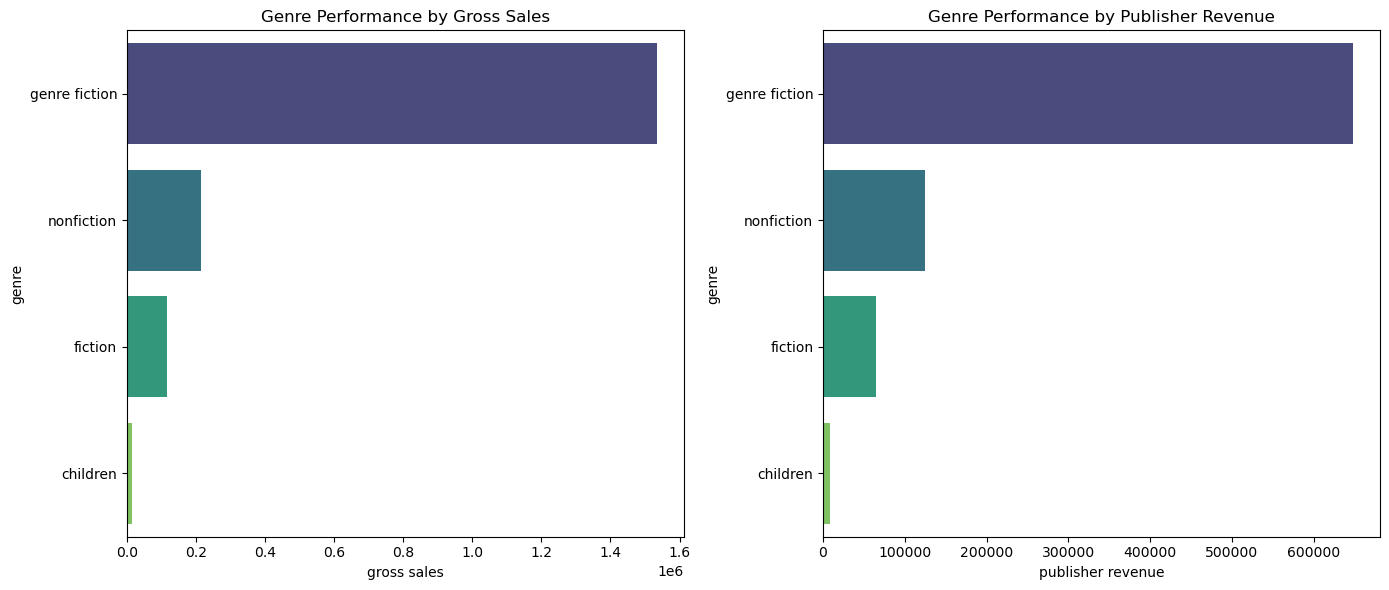

In [39]:
genre_performance = df.groupby('genre')[['gross sales', 'publisher revenue']].sum().sort_values(by='gross sales', ascending=False)
print('Genre Performance by Gross Sales and Publisher Revenue:')
print(genre_performance)

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='gross sales', y=genre_performance.index, data=genre_performance.reset_index(), palette='viridis')
plt.title('Genre Performance by Gross Sales')

plt.subplot(1, 2, 2)
sns.barplot(x='publisher revenue', y=genre_performance.index, data=genre_performance.reset_index(), palette='viridis')
plt.title('Genre Performance by Publisher Revenue')

plt.tight_layout()
plt.show()

## Recommendations
- Books like *Go Set a Watchman* by Harper Lee, *When You Are Engulfed in Flames* by David Sedaris, *New Moon: The Complete Illustrated Movie Companion* by Mark Cotta Vaz and *Maybe Someday* by Colleen Hoover are driving significant revenue. Increasing marketing efforts around these books, such as special promotions, author interviews, and book signing events, can further boost their sales.
- Publishers such as Amazon Digital Services, Inc. and Penguin Group (USA) LLC are leading in sales. Strengthening partnerships with these publishers and coordinating marketing campaigns can further enhance sales performance.
- Genre fiction was found to be the top performer with overwhelming numbers in terms of sales and average ratings. Focus marketing campaigns and promotional activities on these genres. Highlight their success in marketing materials and on the website to attract more readers.
- Children's Books have a high average rating but lower gross sales. Target marketing efforts towards parents and educators to boost sales in this genre. Organize book fairs, virtual author meet-and-greets, and exclusive early access to new releases for loyal customers. 